In [41]:
from skimage.io import imread,imshow,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import collections
import pandas
from statistics import mode

In [57]:
imagem = imread('2.jpeg')
resultado = rgb2gray(imagem)


Trabalho - Filtragem Espacial

Lista de Filtros utilizados na 1º questão: 

In [43]:
def filtro_media(x,y):
    mat = np.ones((x,y)) / (x*y)
    return mat    


In [44]:
laplaciano = np.array(
[
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])


In [45]:
laplacianoneg = np.array(
[
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

In [46]:
media_ponderada = np.array(
[
    [1,2,1],
    [2,4,2],
    [1,2,1]
])/16


In [47]:
prewitt = np.array(
[
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])


In [48]:
sobel = np.array(
[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])


In [49]:
sharpen = np.array(
[
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])


In [50]:
gaussiano = np.array(
    [
        [1,2,1],
        [2,4,2],
        [1,2,1]
    ])

Código da função de Convolução:

In [51]:

def conv(imagem, filtro, borda):
    l,c = imagem.shape
    if borda == 'ignore': 
        l= l-2
        c= c-2 
    
    
    dim = filtro.shape
    im = imagem.shape
    img = imagem.copy()
    tam_filtro = filtro.shape[0]
    
    ajuste = bordas(borda, tam_filtro, img)
    
    for linha in range(im[0]):
        for coluna in range(im[1]):
            recorte = 0
            for linha_r in range(dim[0]):
                for coluna_r in range(dim[1]):
                    recorte +=  ajuste[linha+linha_r, coluna+coluna_r] * filtro[linha_r,coluna_r]
            img[linha][coluna] = recorte        
    return img

Código do tratamento de Borda com 4 valores possíveis:

In [52]:
def bordas(tipo,filtro,imagem):
    ajuste = []
    ajuste = int((filtro-1)/2) #tamanho a ser aumentado em linhas e colunas na imagem
    i = imagem.shape[0]
    j = imagem.shape[1]
    resultado = np.zeros((i+2*ajuste,j+2*ajuste))#imagem + acrescimo
    resultado[ajuste:i+ajuste,ajuste:j+ajuste] = imagem
    
    if tipo == 'ignore': ## Parâmetro na qual a borda não será processada
        return resultado
    if tipo == 'zero': ## O tratamento da borda será adicionado pixels com valores de 0
        return resultado
    if tipo == 'repetir': ## também chamado replicar, consiste em somente os pixels das linhas extremas serem replicados
        #cima
        resultado[:ajuste,:] = resultado[ajuste,:] 
        #esquerda
        resultado[:,:ajuste] = resultado[:,ajuste].reshape((-1,1))
        #baixo
        resultado[-ajuste:,:] = resultado[i+1,:] 
        #direita
        resultado[:,-ajuste:] = resultado[:,j+1].reshape((-1,1))
        return resultado
    elif tipo == 'espelho': 
        resultado[:ajuste, :] = np.roll(resultado[ajuste:ajuste+aajuste,:], -1, axis=0) #primeira linha
        resultado[:, :ajuste] = np.roll(resultado[:, ajuste:ajuste+ajuste], -1, axis=1) #primeira coluna
        resultado[-ajuste:, :] = np.roll(resultado[i:i+ajuste, :], -1, axis=0) #última linha
        resultado[:, -ajuste:] = np.roll(resultado[:, j:j+ajuste], -1, axis=1) #última coluna
        return resultado
    

Função de convolução com pelo menos 5 filtros diferentes.
Resultados: 

Os filtros: Sobel, Prewwitt são máscaras de realce, tem o objetivo principal de acentuação de contornos e enfatizar detalhes dos limites de objetos de modo a permitir sua identificação, temos diferentes resultados de contorno e detecção de borda. No Prewwitt tem o mesmo conceito do de Sobel mas sem o peso para o pixel mais central e é bem mais perceptível e nítido a vizualização das bordas da imagem.

Os filtros: média, média ponderara e gaussiano são para suavizar a imagem pela redução das variações nos de
níveis de cinza na intensidade e em atenuar as altas freqüências, que correspondem às transições abruptas e minimizar ruídos. dando uma aprência de perda de qualidade, borrada.

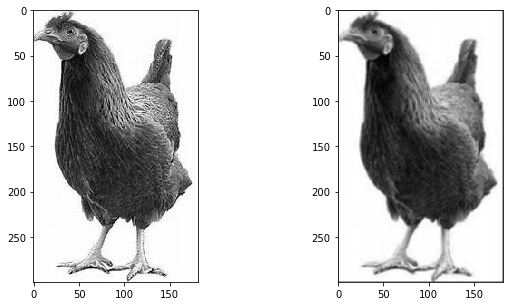

In [95]:
plot(resultado, conv(resultado, filtro_media(3,3), 'zero'))

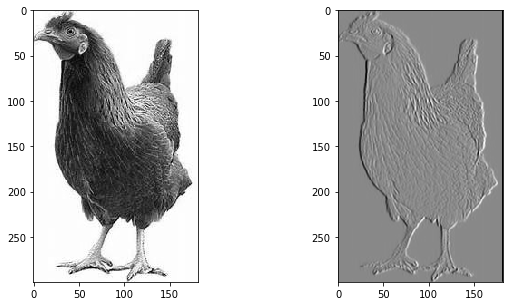

In [96]:
plot(resultado, conv(resultado, sobel, 'repetir'))

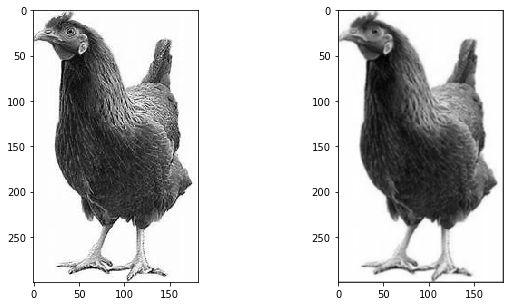

In [97]:
plot(resultado, conv(resultado, media_ponderada, 'ignore'))

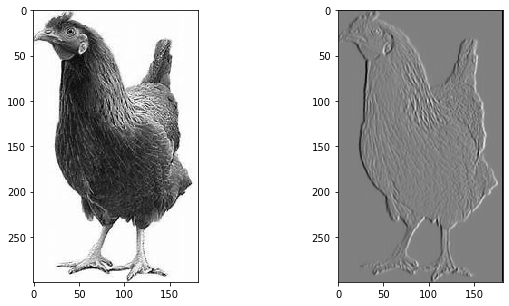

In [98]:
plot(resultado, conv(resultado, prewitt, 'ignore'))

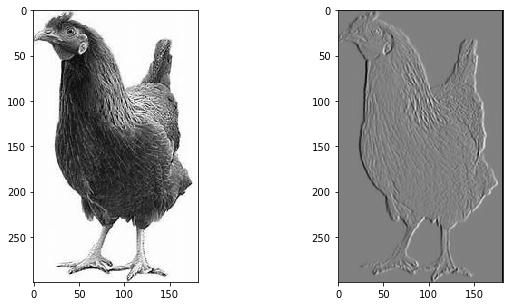

In [99]:
plot(resultado, conv(resultado, sobel, 'ignore'))

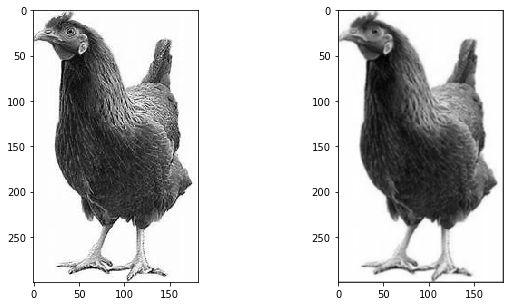

In [100]:
plot(resultado, conv(resultado, gaussiano, 'zero'))  

2º questão - Filtro não-lineares, são filtros utilizados sobre a vizinhança da imagem, não é feita a função de convolução na imagem. 

Abaixo, contém o filtro da mediana que consiste em substituir o valor de cada pixel pela a mediana das intensidades na sua vizinhança. 

In [54]:
#Filtro da mediana
resultado = imread('1.jpeg') #Leitura da imagem
imagem = rgb2gray(resultado)## colocando em níveis de cinza
resultado1 = np.zeros((imagem.shape[0], imagem.shape[1])) ## uma matriz de valores zeros

for i in range(1, imagem.shape[0]-1):
    for j in range(1, imagem.shape[1]-1):## Percorrendo a imagem com a janela de valores da sua vizinhança
        temp = [imagem[i-1, j-1], 
            imagem[i-1, j], 
            imagem[i-1, j + 1], 
            imagem[i, j-1], 
            imagem[i, j], 
            imagem[i, j + 1], 
            imagem[i + 1, j-1], 
            imagem[i + 1, j], 
            imagem[i + 1, j + 1]]
        temp = np.ravel(temp) ##transformando a matriz em um vetor para a comparação de valores, afim de pegar o valor do meio.
        lista = []
        for c in range(len(temp)):
            if c == 0 or temp[c] > lista[-1]:
                lista.append(temp[c])
            else:
                for x in range(len(lista)):
                    if temp[c] <= lista[x]:
                        lista.insert(x,temp[c])
                        break
        resultado1[i,j] = lista[4] ## a matriz criada anteriormente recebendo os valores de cada pixel  pela a mediana das intensidades da sua vizinhança.
#plt.imshow(resultado1, cmap='gray')

Filtro do mínimo, consiste em substituir a intensidade de cada pixel  pela a menor intensidade na sua vizinhança e assim aumenta a area das regiões escuras e consequentemente dominando as regiões claras. 

In [9]:
#Filtro do Mínimo
resultado2 = imread('1.jpeg')
imagem1 = rgb2gray(resultado2)
img_finalmin = np.zeros((imagem1.shape[0], imagem1.shape[1]))

for i in range(1, imagem1.shape[0]-1):
    for j in range(1, imagem1.shape[1]-1):
        temp = [imagem1[i-1, j-1], 
            imagem1[i-1, j], 
            imagem1[i-1, j + 1], 
            imagem1[i, j-1], 
            imagem1[i, j], 
            imagem1[i, j + 1], 
            imagem1[i + 1, j-1], 
            imagem1[i + 1, j], 
            imagem1[i + 1, j + 1]]
        mini = 255
        temp = np.ravel(temp)
        for t in range(len(temp)):
                if mini > temp[t]:
                    mini = temp[t]
        img_finalmin[i, j] = mini
#plt.imshow(img_finalmin, cmap='gray')

Filtro máximo consiste em substituir a intensidade de cada pixel pela a maior intensidade da sua vizinhança, e assim aumentando suas regiões claras, dominando as regiões escuras.

In [13]:
#Filtro máximo
resultado2 = imread('1.jpeg')
imagem1 = rgb2gray(resultado2)
img_finalmax = np.zeros((imagem1.shape[0], imagem1.shape[1]))

for i in range(1, imagem1.shape[0]-1):
    for j in range(1, imagem1.shape[1]-1):
        temp = [imagem1[i-1, j-1], 
            imagem1[i-1, j], 
            imagem1[i-1, j + 1], 
            imagem1[i, j-1], 
            imagem1[i, j], 
            imagem1[i, j + 1], 
            imagem1[i + 1, j-1], 
            imagem1[i + 1, j], 
            imagem1[i + 1, j + 1]]
        maior = 0
        temp = np.ravel(temp)
        for t in range(len(temp)):
                if maior < temp[t]:
                    maior = temp[t]
        img_finalmax[i, j] = maior
##plt.imshow(img_finalmax, cmap='gray')

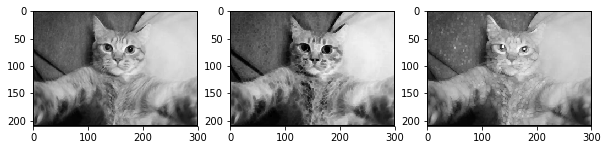

In [19]:
# Filtro da mediana, mínimo e máximo. 
plot1(resultado1, img_finalmin, img_finalmax)  

Filtro da moda consiste em substituir a intensidade de cada pixel pela a intensidade que ocorre com maior frequência na sua vizinhança.

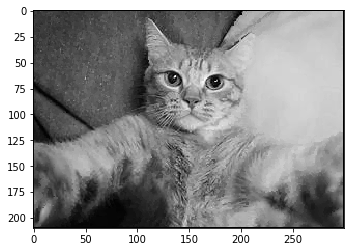

In [16]:
##Filtro da moda 
resultado2 = imread('1.jpeg')
imagem1 = rgb2gray(resultado2)
img_finalmax1 = np.zeros((imagem1.shape[0], imagem1.shape[1]))

for i in range(1, imagem1.shape[0]-1):
    for j in range(1, imagem1.shape[1]-1):
        temp = [imagem1[i-1, j-1], 
            imagem1[i-1, j], 
            imagem1[i-1, j + 1], 
            imagem1[i, j-1], 
            imagem1[i, j], 
            imagem1[i, j + 1], 
            imagem1[i + 1, j-1], 
            imagem1[i + 1, j], 
            imagem1[i + 1, j + 1]]        
        temp = np.ravel(temp)
        descobertas = collections.Counter(temp)
        m=max(descobertas.values())
        for x in descobertas:
            if descobertas[x] == m:
                moda = x
        img_finalmax1[i,j] = moda
        
plt.imshow(img_finalmax1, cmap='gray')

In [21]:
def plot(img, img2):
    fig, axe = plt.subplots(1, 2, figsize = (10, 5))
    axe[0].imshow(img, cmap = 'gray')
    axe[1].imshow(img2, cmap = 'gray')
    

3 questão - Filtro Laplaciano 

In [ ]:
Convolução com o Filtro Laplaciano na imagem original. 

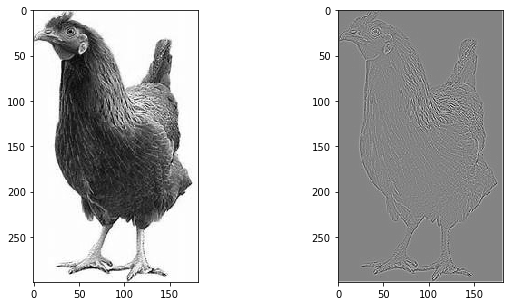

In [121]:
#Imagem Original e imagem lAPLACIANA na cor cinzenta sobreposta a um fundo sem característica
plot(resultado, conv(resultado, laplaciano, 'zero'))

** Convolução com o Filtro Laplaciano em uma imagem borrada e realce

Primeiro, é utilizado filtros espaciais de suavização na imagem, afim de reduzir detalhes pequenos, reduzir ruídos, suavizar falsos contornos e reduzir detalhes irrelevantes na imagem que geralmente são regiões menores do que o tamanho da janela. Neste caso foi utilizado o Filtro da média em uma janela 3x3 para borrar a imagem na função de convolução.

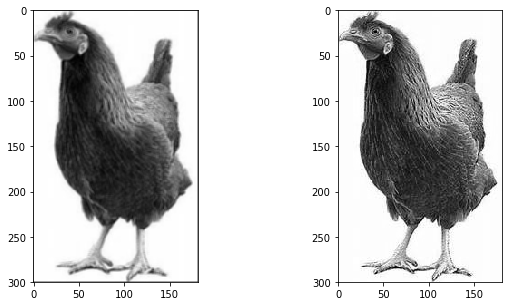

In [58]:
borrada = conv(resultado, filtro_media(3,3), 'zero') 
plot(borrada, resultado)  

O filtro Laplaciano realça transições de intensidade enfatizando descontinuidade, seu somatório é 0 em regiões homogêneas e valores mais elevados próximos aos seus contornos. Esta característica produz imagens que apresentam arestas e outras descontinuidades na cor cinzenta sobreposta a um fundo sem características. O fundo pode ser construído, preservando as descontinuidades somando a imagem Laplaciana á original. O centro da mascara pode ser positivo com c=1 ou negativo com c=-1.

In [59]:
filtrol = conv(borrada, laplaciano, 'zero') #Imagem com o centro positivo do Laplaciano'

filtroln = conv(borrada, laplacianoneg, 'zero') #Imagem com o centro negativo do Laplaciano

realce = resultado + (1 * filtrol) #Realce com o centro positivo do Laplaciano'

realce1 = resultado + (-1 * filtroln) #Realce com o centro negativo do Laplaciano




No caso abaixo o fundo da imagem está cinza porque na convolução não foi possível obter a construção do fundo preservando seus valores, de acordo com o filtro laplaciando é atribuído 0 a regiões homogêneas e na soma não se altera, e o fundo que antes era branco, está cinza, mas no seu desempenho em apresentar arestas e descontinuidades na cor cinzenta e preserva-la somada á original, o código conseguiu manter nos centros negativo e positivo. O filtro gera valores muito altos ou muito baixos.

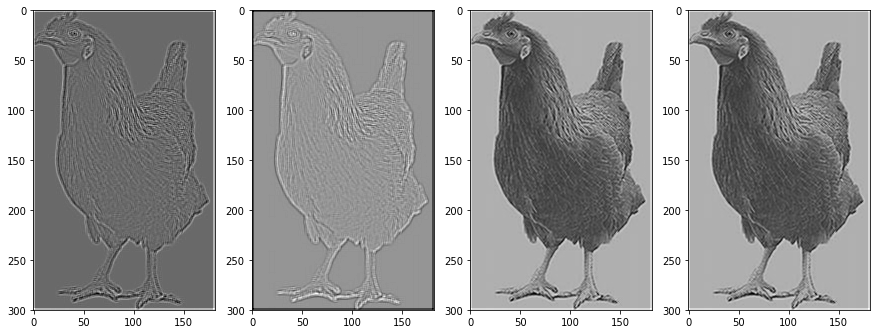

In [60]:
plot3(filtrol,filtroln,realce,realce1)

In [6]:
def plot3(img, img2,img3,img4):
    fig, axe = plt.subplots(1, 4, figsize = (15, 30))
    axe[0].imshow(img, cmap = 'gray')
    axe[1].imshow(img2, cmap = 'gray')
    axe[2].imshow(img3, cmap = 'gray')
    axe[3].imshow(img3, cmap = 'gray')
    

4 - Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo da
questão 1. Explique os passos de ambas implementações e diferencie o resultado das
mesmas. Utilize pelo menos 5 valores de k no intervalor 0 < k < 2 e diferencie o resultado das mesmas.

Processo: 1 - Borrar a imagem original
          2 - Subtrair a imagem borrada da original(Máscara de Nitidez)
          3 - Somar a máscara á imagem original

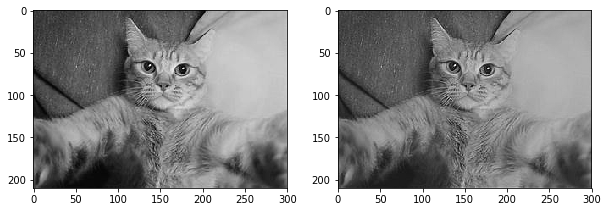

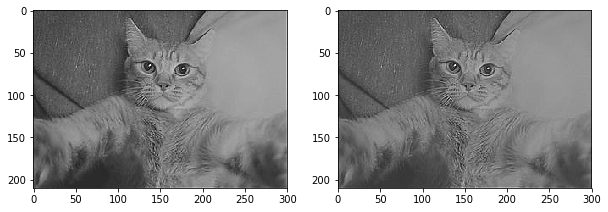

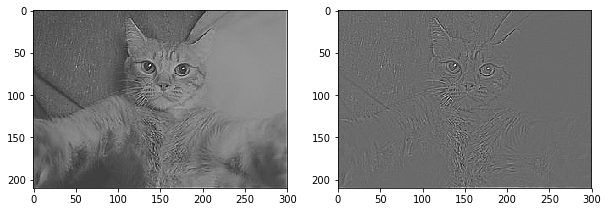

In [29]:
#filtragem high-boost
imagem = imread('1.jpeg')
origi = rgb2gray(imagem)
shape = origi.shape

img_origi = origi
img_filtro = conv(origi, filtro_media(3,3), 'repetir') ## Passo 1 

masc_nitidez = img_origi-img_filtro ##Passo 2 

resultado_som = masc_nitidez+img_origi ## Passo 3 

def hb(x):
    return masc_nitidez*x+img_origi

plot(hb(0.1),hb(0.5)) ## para K=1(nesse caso x), a máscara é somada á imagem original
plot(hb(0.9),hb(1.5)) ## para k<1, reduz a contribuição da máscara
plot(hb(1.9),masc_nitidez) ## para k>1, processo high-boost filtering  e a mascara de nitidez

Um processo para aumentar a nitidez das
imagens consistindo em subtrair uma versão não
nítida (suavizada) de uma imagem da imagem
original.Aumentando o K vai 


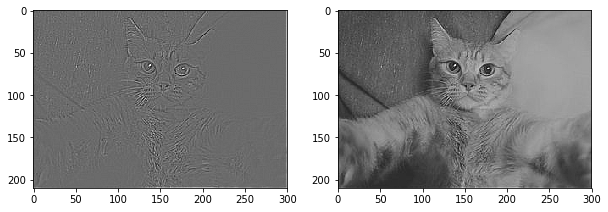

In [30]:
plot(masc_nitidez, resultado_som)

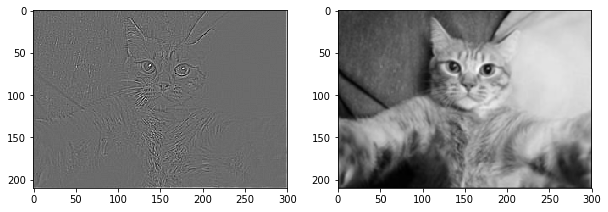

In [31]:
plot(masc_nitidez, img_filtro)

In [81]:
def plot5(img, img2,img3,img4,img5):
    fig, axe = plt.subplots(2, 5, figsize = (15, 30))
    axe[0].imshow(img, cmap = 'gray')
    axe[1].imshow(img2, cmap = 'gray')
    axe[2].imshow(img3, cmap = 'gray')
    axe[3].imshow(img3, cmap = 'gray')
    axe[4].imshow(img3, cmap = 'gray')

In [17]:
def plot1(img, img2,img3):
    fig, axe = plt.subplots(1, 3, figsize = (10, 5))
    axe[0].imshow(img, cmap = 'gray')
    axe[1].imshow(img2, cmap = 'gray')
    axe[2].imshow(img3, cmap = 'gray')

Aplique os filtros da média e mediana em uma imagem ruidosa, o que aconteceu? Qual tipo
de ruído existia na imagem?

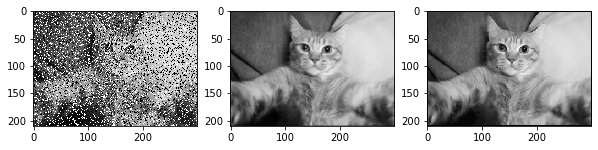

In [73]:
from skimage.util import random_noise

image5 = imread('1.jpeg')
resultado6 = rgb2gray(image5)

noise_img1 = random_noise(resultado6, mode='s&p',amount=0.3)

plot1(noise_img1, conv(resultado6, filtro_media(3,3), 'zero'), resultado3)


Imagem número 1 cotém o ruído sal e pimenta , a segunda imagem contém o filtro da média e a figura 3 o filtro da mediana.

O filtro da mediana é adequada para reduzir ruídos impulsivos que são valores aleartórios diferentes da linha de valores de intensidade da sua vizinhança, então o filtro força esses valores distintos ficarem mais parecidos com sua vizinhança e com menos borramento do que o filtro da média, pois utiliza a mediana de todos os valores. O filtro da mediana deixa a imagem menos borrada, mais nítida e reduz significamente e vizualmente os ruídos aleartórios que são pixels muito claros ou muito escuros em regiões distintas. É utilizado filtros espaciais de suavização na imagem, afim de reduzir detalhes pequenos, reduzir ruídos, suavizar falsos contornos e reduzir detalhes irrelevantes na imagem que geralemnte são regiões menores do que o tamanho da janela.

In [74]:
resultado = imread('1.jpeg')
imagem = rgb2gray(resultado)
resultado3 = np.zeros((imagem.shape[0], imagem.shape[1]))

for i in range(1, imagem.shape[0]-1):
    for j in range(1, imagem.shape[1]-1):
        temp = [imagem[i-1, j-1], 
            imagem[i-1, j], 
            imagem[i-1, j + 1], 
            imagem[i, j-1], 
            imagem[i, j], 
            imagem[i, j + 1], 
            imagem[i + 1, j-1], 
            imagem[i + 1, j], 
            imagem[i + 1, j + 1]]
        temp = np.ravel(temp)
        lista = []
        for c in range(len(temp)):
            if c == 0 or temp[c] > lista[-1]:
                lista.append(temp[c])
            else:
                for x in range(len(lista)):
                    if temp[c] <= lista[x]:
                        lista.insert(x,temp[c])
                        break
        resultado3[i,j] = lista[4]
##plt.imshow(resultado3, cmap='gray')

6 questão Extra: QUAL A DIFERENÇA ENTRE  POSITIVO E O NEGATIVO REALÇADO  DA IMAGEM LUA DO SLIDE, E PORQUE A SEGUNDA IMAGEM ESTÁ MELHOR ?
O filtro laplaciano de realce é para retornar uma imagem com uma resposta mais acentuada a detalhes finos como
pontos isolados e linhas. O Centro negativo: remove bordas exteriores e o centro positivo: remove bordas interiores.

No positivo realça as bordas ou descontinuidades na imagem,
porém ameniza regiões com nível de cinza constante e o fundo da imagem se torna "perdido”, mas pode ser “reconstruído”, preservando as descontinuidades, somando a imagem Laplaciana à imagem original, com o centro igual a 1.

Na negativa permite “Recuperar” o fundo da imagem, ele leva em consideração o fundo da borda e a imagem perde contraste 
, com o valor positivo  a imagem parece manter o contraste,
reflectindo-se no entanto numa melhor preservação das bordas, então a melhor é a imagem realçada com a constante positiva. 